In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
x=np.array([1,2,3,4,5])
y=np.array([3,4,2,4,5])

In [3]:
dic={'x':x,'y':y}
df=pd.DataFrame(dic)
df

,x,y
0,1,3
1,2,4
2,3,2
3,4,4
4,5,5


In [5]:
xmean=df['x'].mean()
ymean=df['y'].mean()
m=sum((x-xmean)*(y-ymean))/sum((x-xmean)**2)
c=ymean-(m*xmean)
print(xmean)
print(ymean)
print(m)
print(c)

3.0
3.6
0.4
2.4


In [8]:

def linreg(x):
  return (m*x)+c
ypred=list(map(linreg,x))
print(ypred)
ypred=np.array(ypred)


[2.8, 3.2, 3.6, 4.0, 4.4]


In [9]:
d={'x':x,"Ay":y,"Py":ypred}
df=pd.DataFrame(d)
df

,x,Ay,Py
0,1,3,2.8
1,2,4,3.2
2,3,2,3.6
3,4,4,4.0
4,5,5,4.4


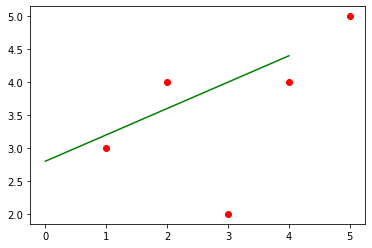

In [10]:
plt.scatter(df['x'],df['Ay'],color='red')
plt.plot(ypred,color='green')
plt.show()

In [11]:

R2=sum((ypred-ymean)**2)/sum((y-ymean)**2)
R2

0.3076923076923078

# Simple Linear Regression

In [12]:

df = pd.read_csv('Salary_Data (1).csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [14]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [15]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [16]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=0)

In [17]:
#Step1: import the model (class) from the package
from sklearn.linear_model import LinearRegression

#Step2: create an object for the linearRegression
linreg = LinearRegression()

#Step3: train the data (find the value of m and c) using fit method
linreg.fit(xtrain,ytrain)

#Step4 : Use predict
ypred = linreg.predict(xtest)

In [18]:
from sklearn.metrics import r2_score

print(f"Accuracy : {r2_score(ytest,ypred)}")

Accuracy : 0.988169515729126


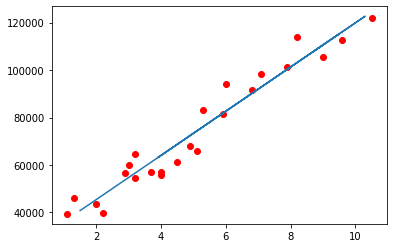

In [19]:
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtest,linreg.predict(xtest))
plt.show()

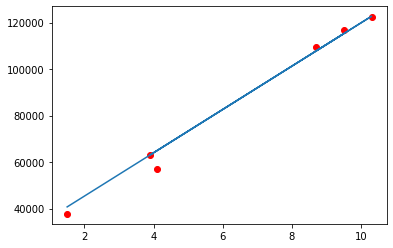

In [20]:
plt.scatter(xtest,ytest,color='red')
plt.plot(xtest,linreg.predict(xtest))
plt.show()

In [21]:
linreg.coef_

array([9312.57512673])

In [22]:
linreg.intercept_

26780.09915062818

In [35]:
df_coef = pd.DataFrame(linreg.coef_,x.columns,columns=["Coefficient"])
df_coef

,Coefficient
Avg. Area Income,21.666735
Avg. Area House Age,164990.051829
Avg. Area Number of Rooms,120784.238317
Avg. Area Number of Bedrooms,1542.524676
Area Population,15.150370


In [36]:
from sklearn.metrics import mean_absolute_error as mae ,mean_squared_error as mse, r2_score

mae = mae(ypred,ytest)
mse = mse(ypred,ytest)
rmse = np.sqrt(mse)
accuracy = r2_score(ypred,ytest)

print('Mean_Absolute_Error :',mae)
print('Mean_Squared_Error :',mse)
print('Root_Mean_Squared_Error :',rmse)
print('Acuracy :',accuracy)

Mean_Absolute_Error : 82494.73770125103
Mean_Squared_Error : 10543597313.62491
Root_Mean_Squared_Error : 102682.0204009685
Acuracy : 0.915276726610807
